# Importing the Libraries

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Framing the problem

Loblaws Digital aims to predict customer attrition (churn) and develop strategies to retain customers. 
This project involves building a predictive model using customer data to identify at-risk customers and 
providing actionable insights for retention strategies.

# Getting the data

In [145]:
data = pd.read_excel('loblaws.xlsx', sheet_name='E Comm')
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Exploratory Data Analysis

## Describe the data

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

We will drop the customer Id now because it is redundant.

In [147]:
data.drop(columns=['CustomerID'], inplace=True)

In [148]:
data.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


## Missing Values

In [149]:
missing_values = data.isnull().sum()
print(missing_values)

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


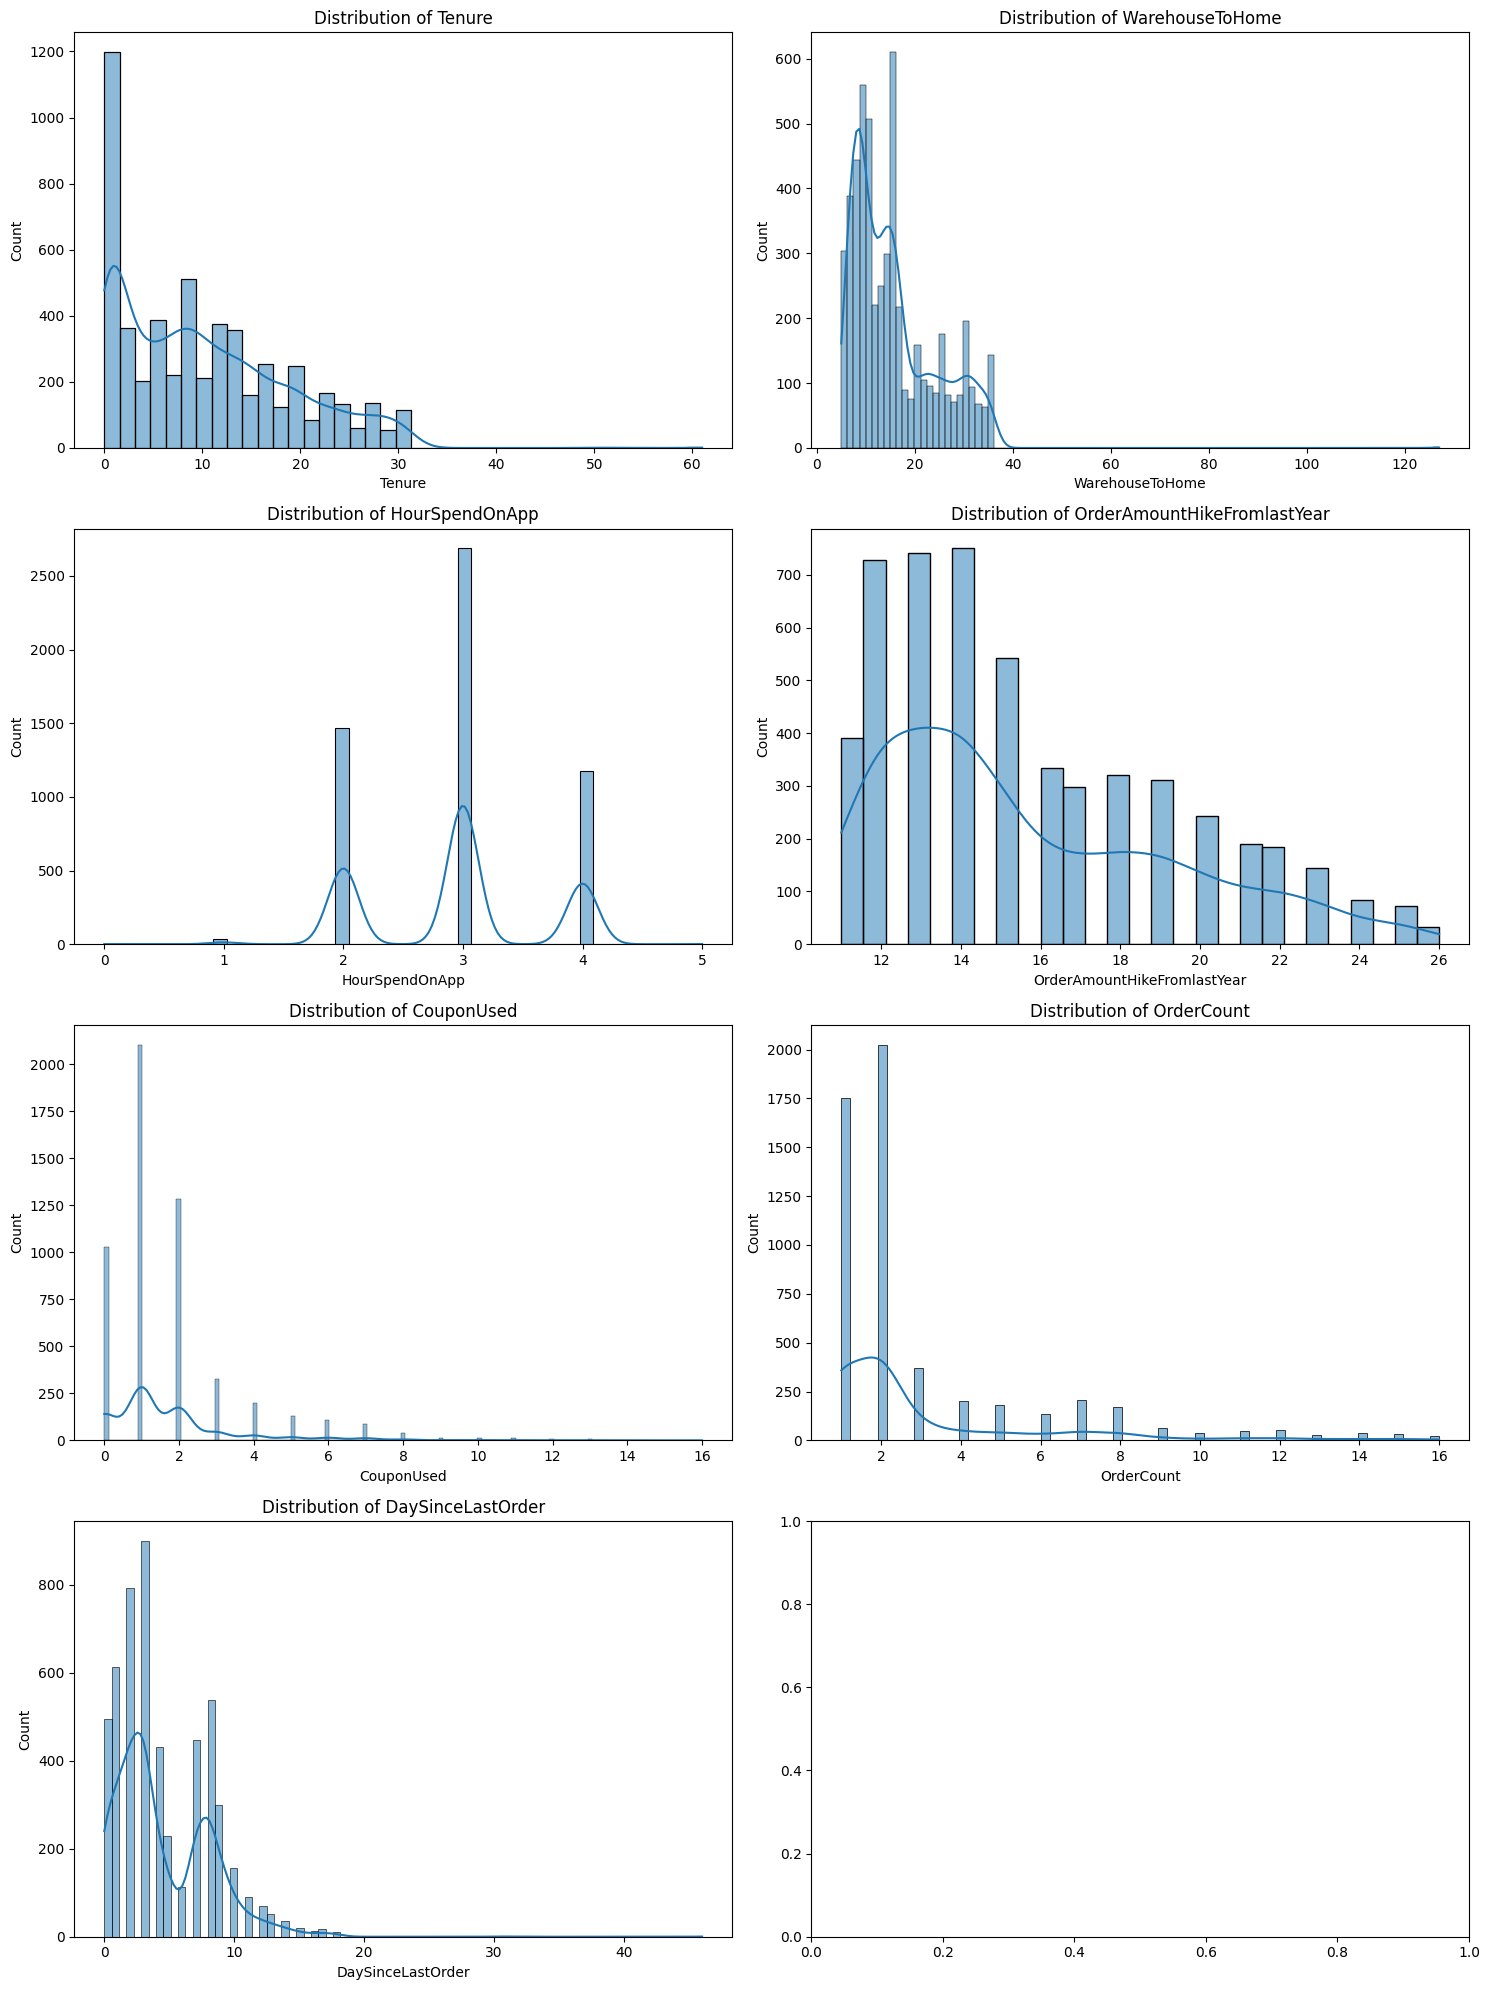

In [150]:
columns_with_missing = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                        'OrderAmountHikeFromlastYear', 'CouponUsed', 
                        'OrderCount', 'DaySinceLastOrder']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for idx, column in enumerate(columns_with_missing):
    sns.histplot(data[column], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

In [151]:
data['Tenure'].fillna(data['Tenure'].median(), inplace=True)
data['WarehouseToHome'].fillna(data['WarehouseToHome'].median(), inplace=True)
data['HourSpendOnApp'].fillna(data['HourSpendOnApp'].median(), inplace=True)
data['OrderAmountHikeFromlastYear'].fillna(data['OrderAmountHikeFromlastYear'].median(), inplace=True)
data['CouponUsed'].fillna(data['CouponUsed'].median(), inplace=True)
data['OrderCount'].fillna(data['OrderCount'].median(), inplace=True)
data['DaySinceLastOrder'].fillna(data['DaySinceLastOrder'].median(), inplace=True)

## Visualize the distribution of Churn

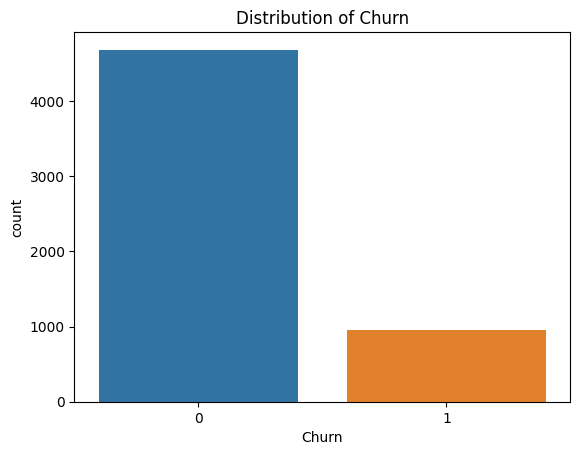

In [152]:
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()

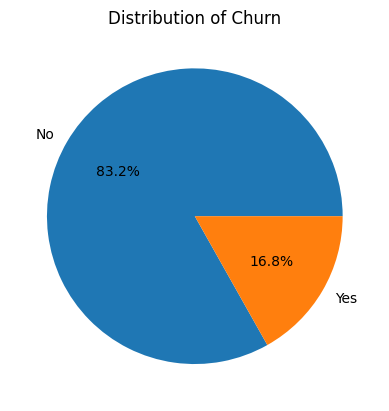

In [153]:
plt.pie(data['Churn'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Distribution of Churn')
plt.show()

## Plot distributions of numeric variables

In [154]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(include=[object]).columns


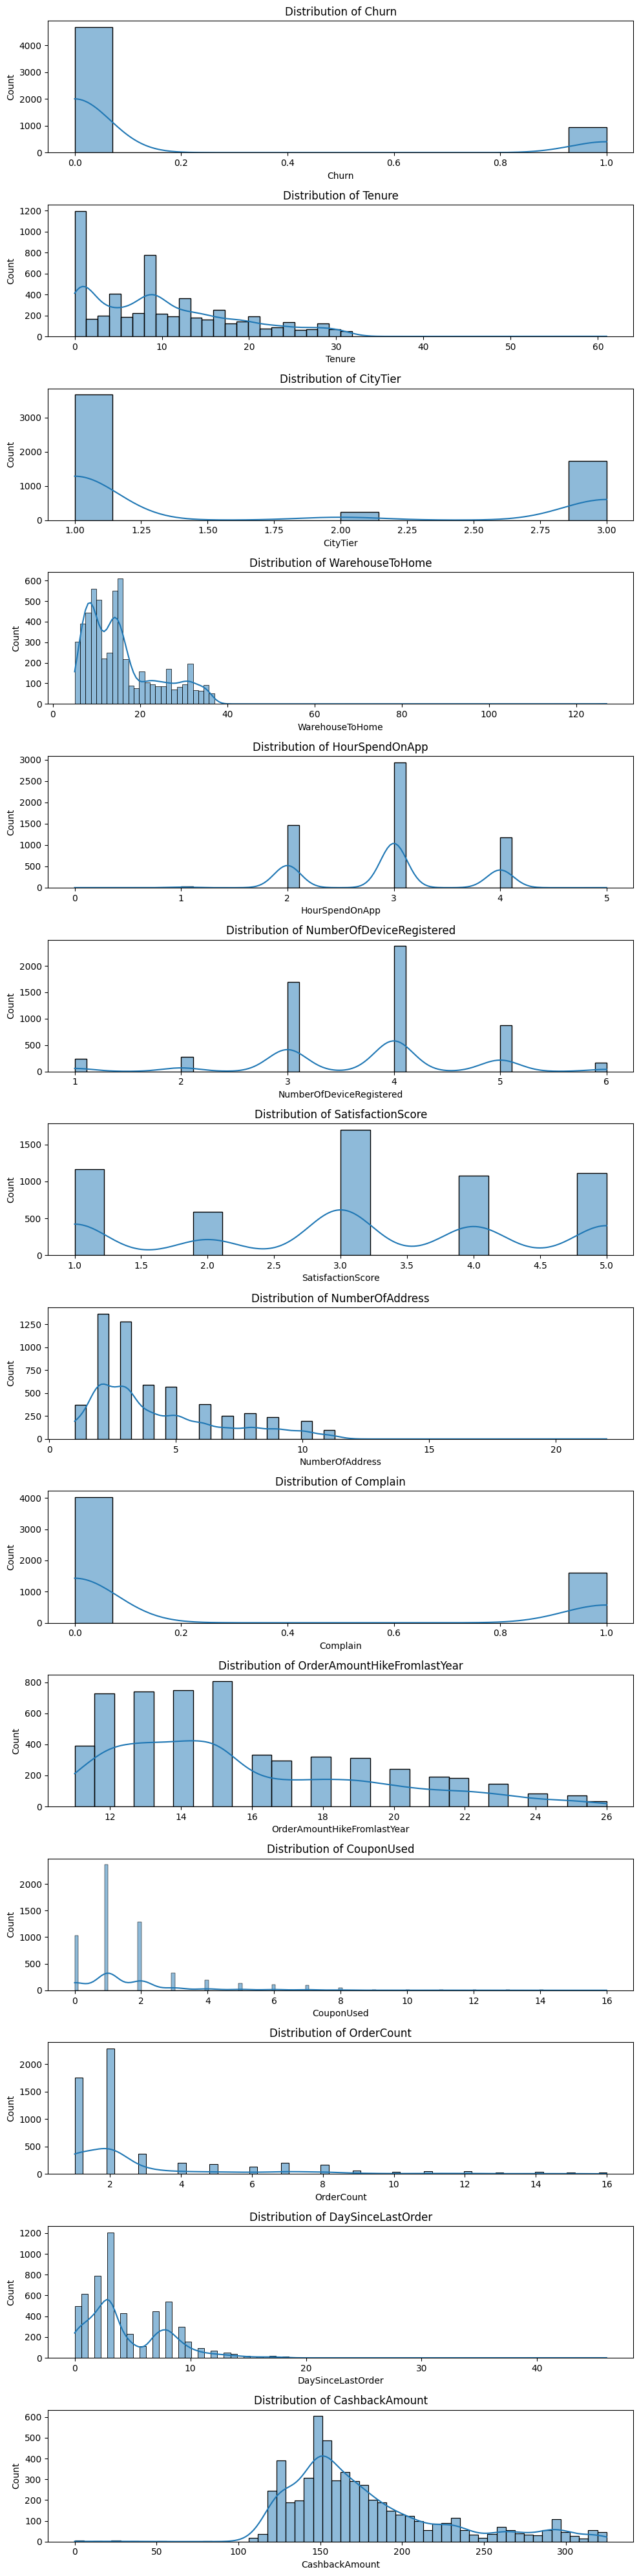

In [155]:
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 40))
axes = axes.flatten()
for idx, column in enumerate(numeric_columns):
    sns.histplot(data[column], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

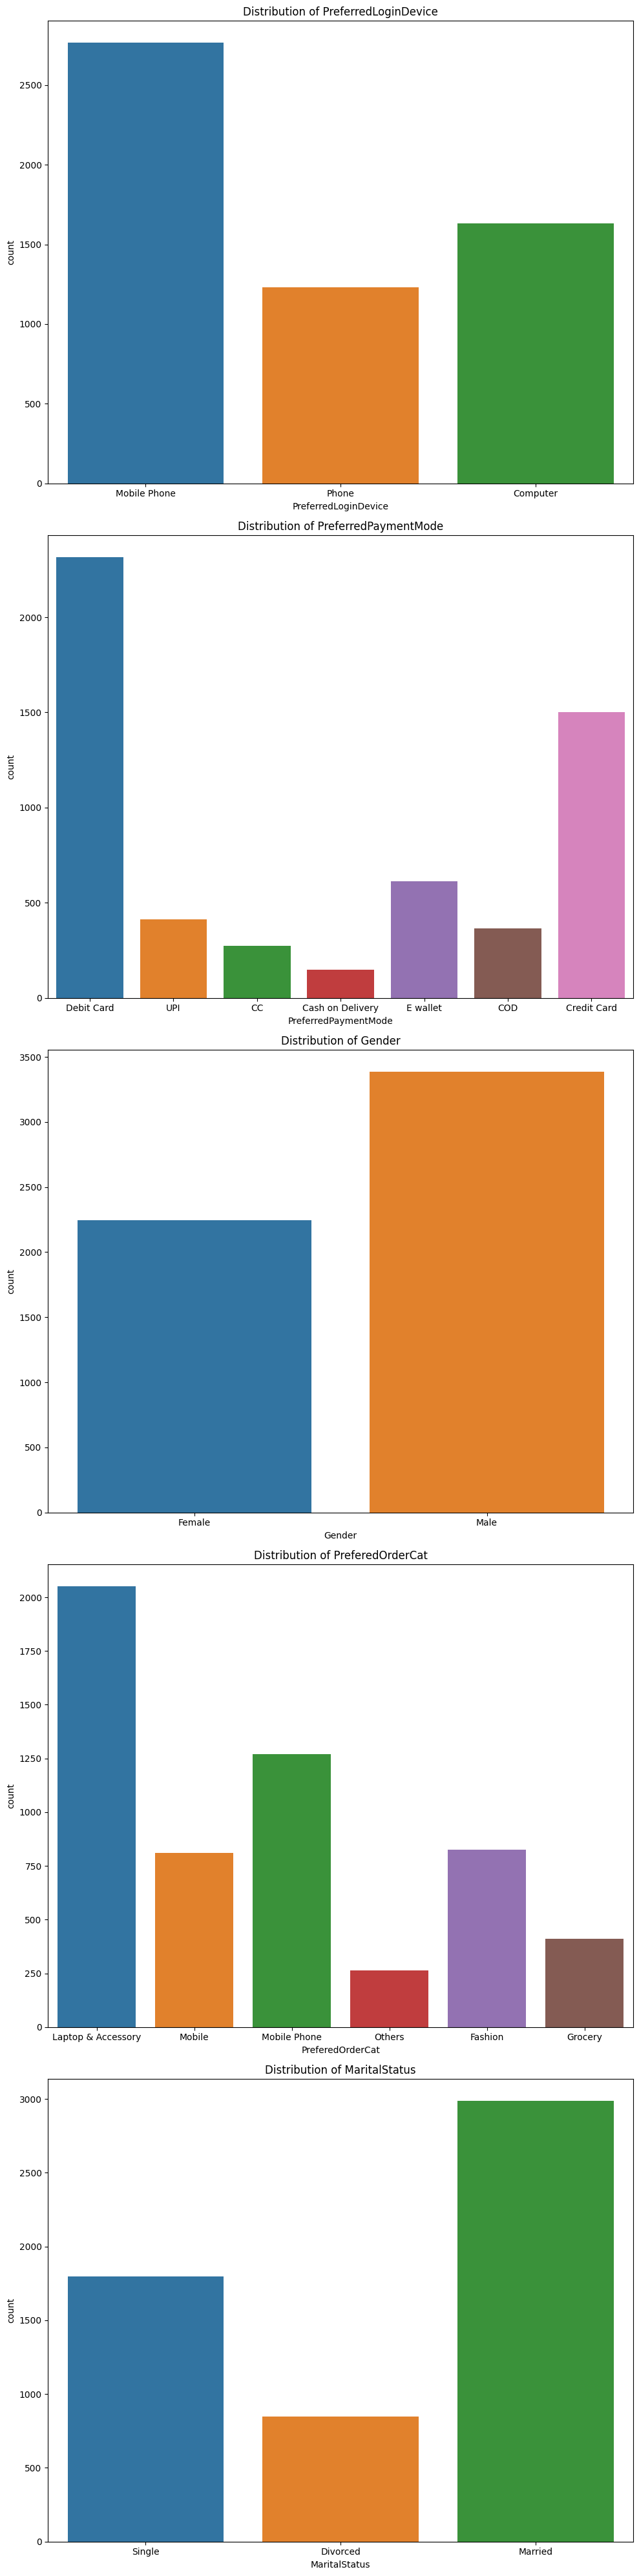

In [156]:
# plot the distribution of categorical columns
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 40))
axes = axes.flatten()
for idx, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=data, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column}')
plt.tight_layout()


## Check for outliers and remove using IQR

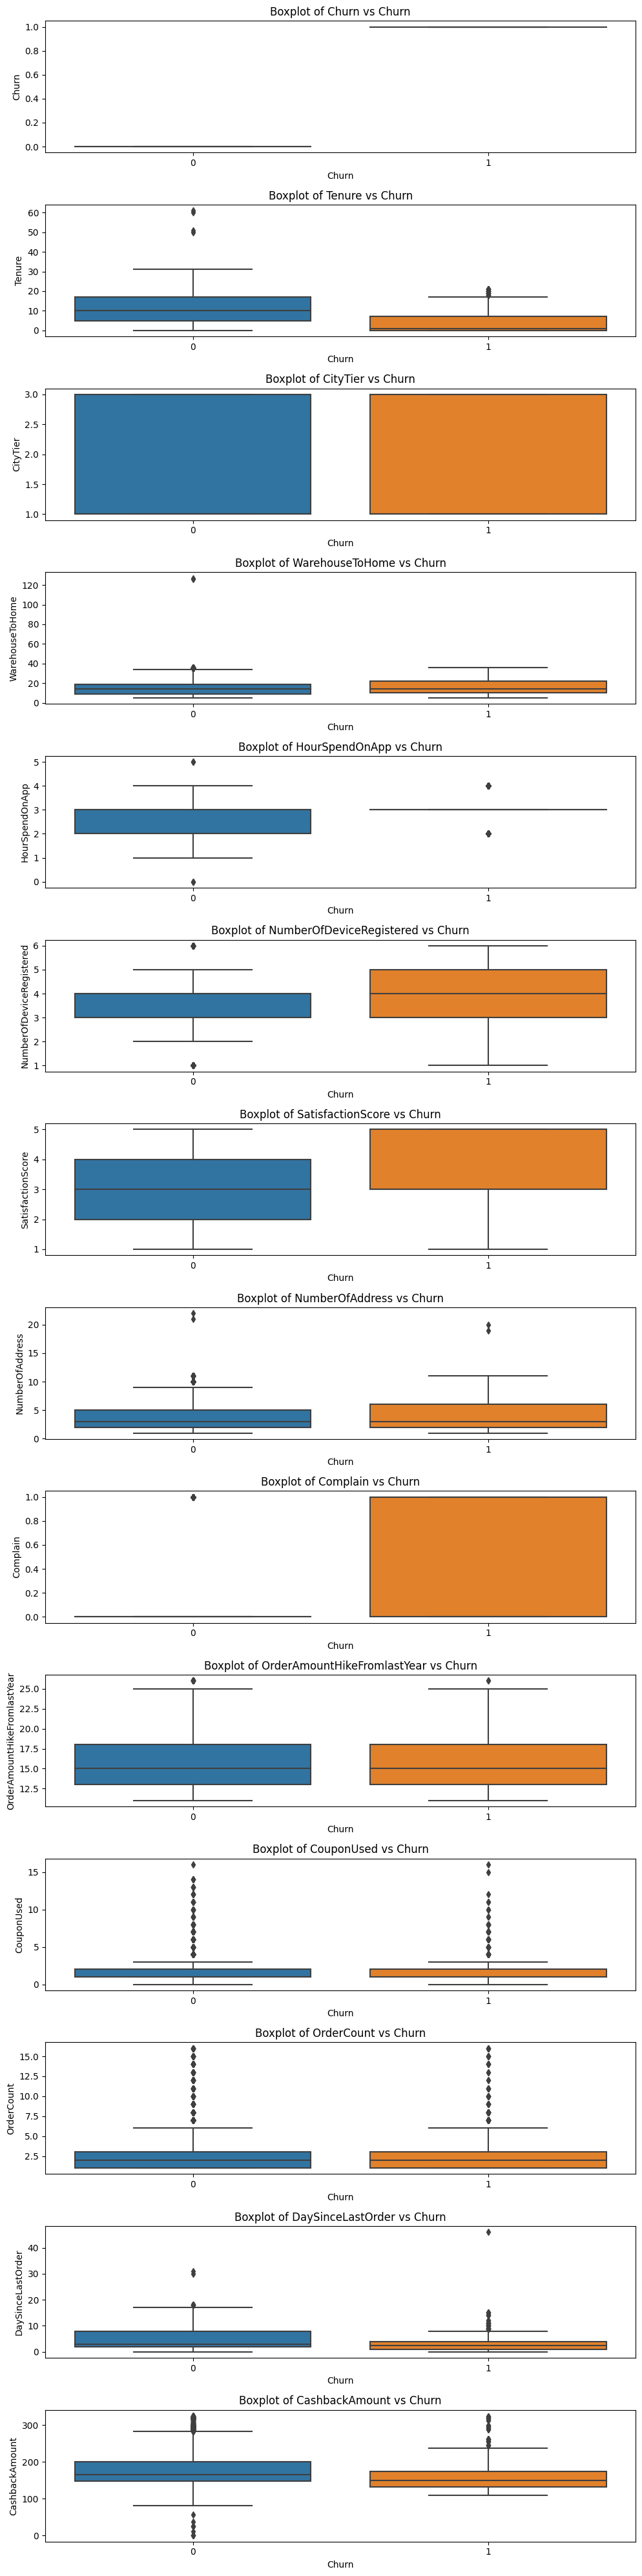

In [157]:
# boxplot of numeric columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 40))
axes = axes.flatten()
for idx, column in enumerate(numeric_columns):
    sns.boxplot(x='Churn', y=column, data=data, ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {column} vs Churn')
plt.tight_layout()

In [158]:
def remove_outliers(df):
    for column in numeric_columns:
        if column != 'Churn':
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

data = remove_outliers(data)

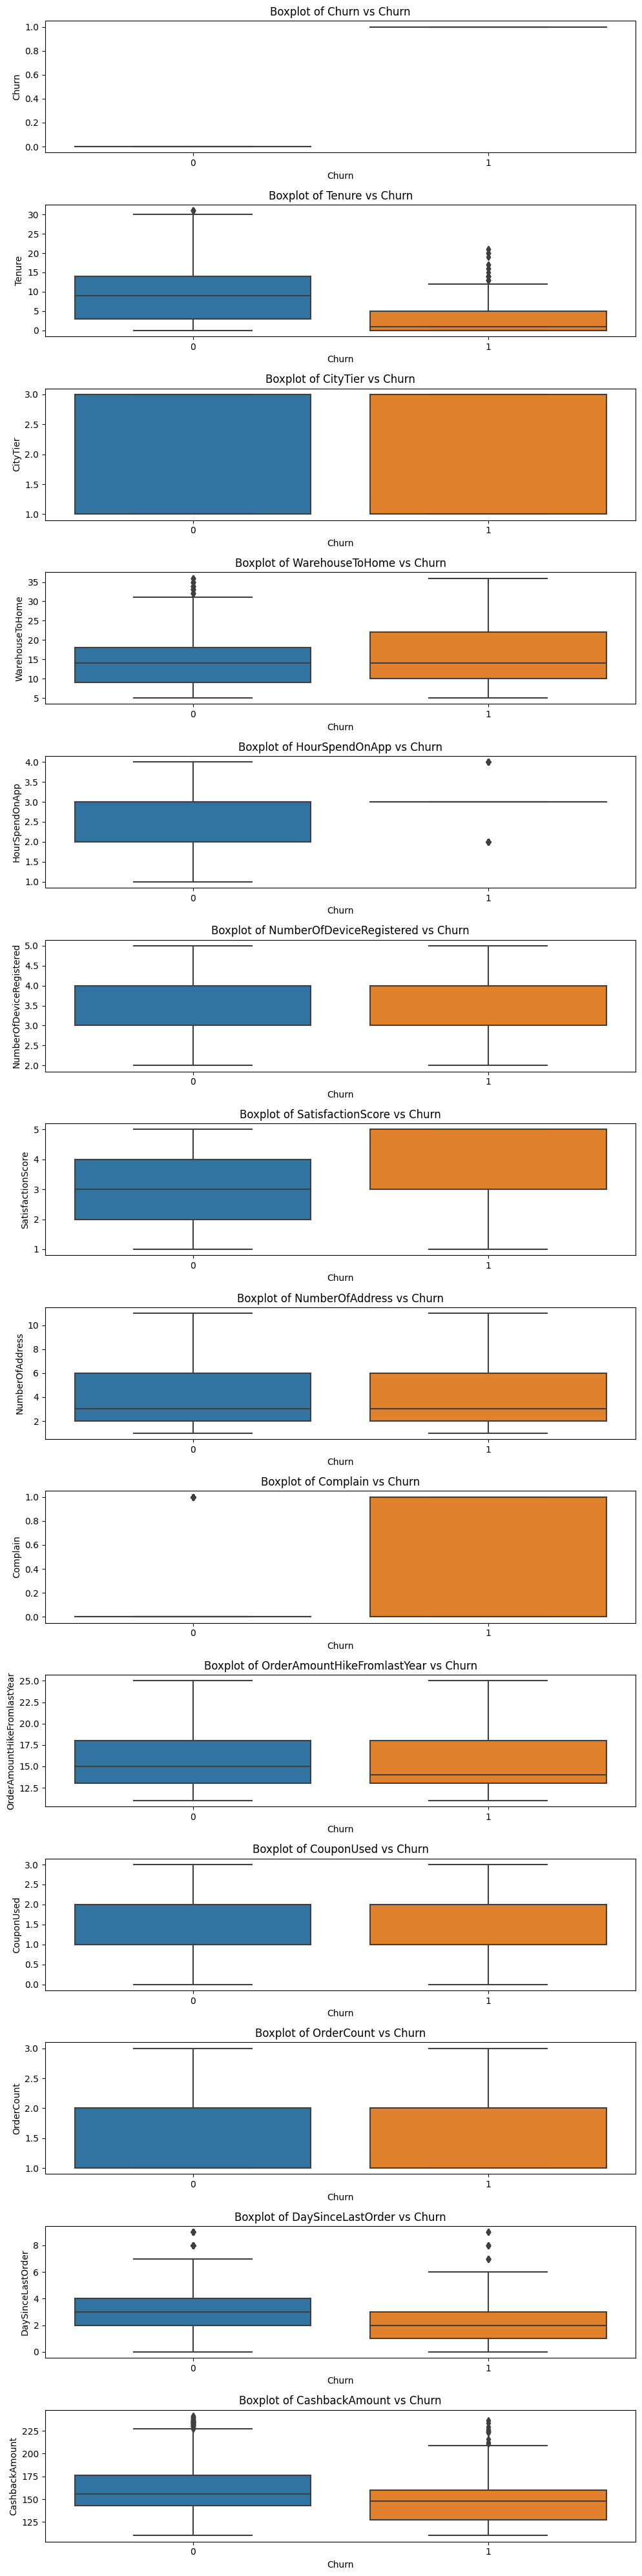

In [159]:
# boxplot of numeric columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 40))
axes = axes.flatten()
for idx, column in enumerate(numeric_columns):
    sns.boxplot(x='Churn', y=column, data=data, ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {column} vs Churn')
plt.tight_layout()

In [160]:
data

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


## Correlation Matrix

In [161]:
from sklearn.preprocessing import LabelEncoder

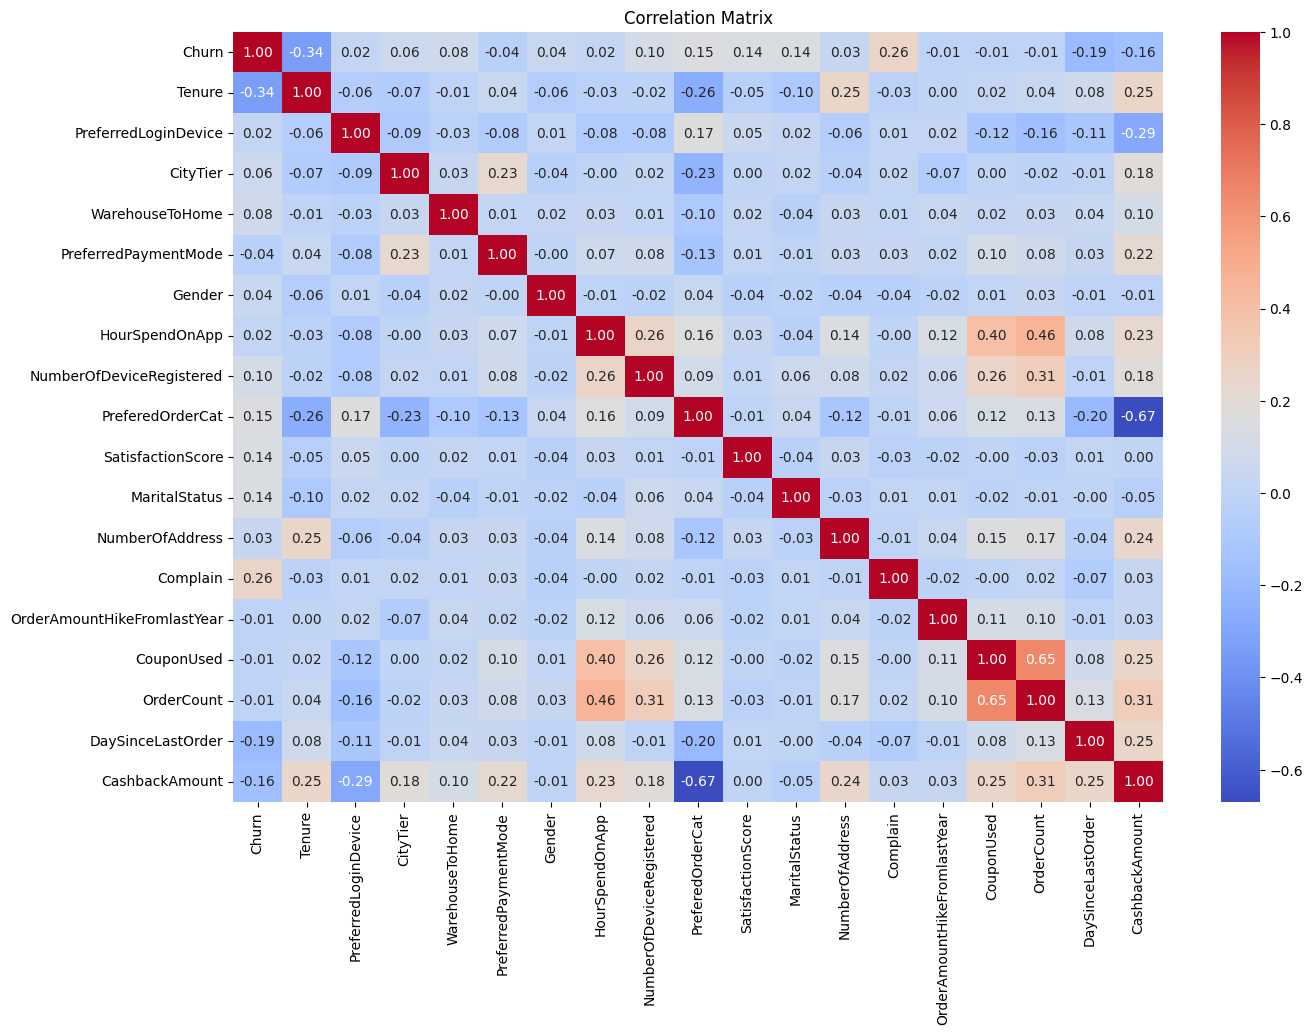

In [162]:
# show the correlation matrix of the data after label encoding the categorical columns
label_encoded_data = data.copy()
label_encoder = LabelEncoder()
for column in categorical_columns:
    label_encoded_data[column] = label_encoder.fit_transform(label_encoded_data[column])

correlation_matrix = label_encoded_data.corr().round(2)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Feature Selection

In [163]:
selected_features = correlation_matrix['Churn'].sort_values(ascending=False).index[1:11].tolist()
print(f'Selected Features: {selected_features}')

Selected Features: ['Complain', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfDeviceRegistered', 'WarehouseToHome', 'CityTier', 'Gender', 'NumberOfAddress', 'HourSpendOnApp']


# Data Preprocessing

In [164]:
# Encode categorical features before applying SMOTE
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

## Handling class imbalance using SMOTE if necessary

In [165]:
# Handling class imbalance using SMOTE if necessary
y = data_encoded['Churn']
X = data_encoded.drop(columns=['Churn'])
if y.value_counts(normalize=True)[1] < 0.4:  # Assuming class imbalance if less than 40% churn
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)

### Data Splitting and Normalization

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
# Normalize numeric features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

# Combine transformations
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)], remainder='passthrough')

# Apply the transformations to the training and test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Model Training and Evaluation

Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       570
           1       0.83      0.87      0.85       572

    accuracy                           0.84      1142
   macro avg       0.84      0.84      0.84      1142
weighted avg       0.84      0.84      0.84      1142

ROC AUC Score: 0.9181296773402037



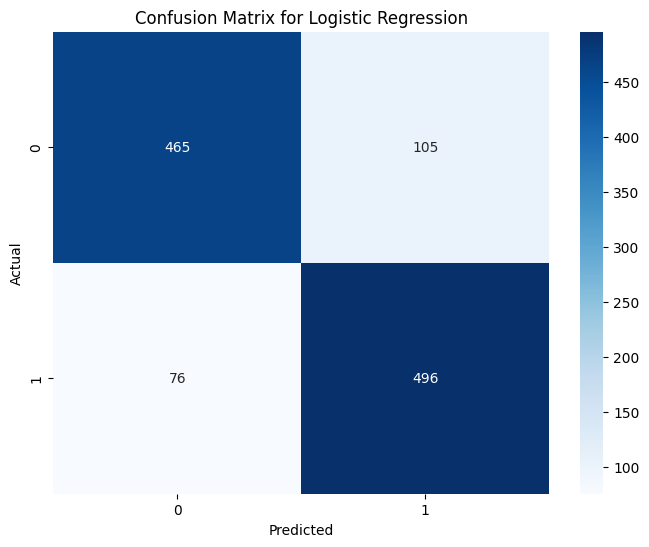

In [168]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
print("Logistic Regression")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}\n")

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       570
           1       0.96      0.99      0.98       572

    accuracy                           0.98      1142
   macro avg       0.98      0.98      0.98      1142
weighted avg       0.98      0.98      0.98      1142

ROC AUC Score: 0.9965571708992761



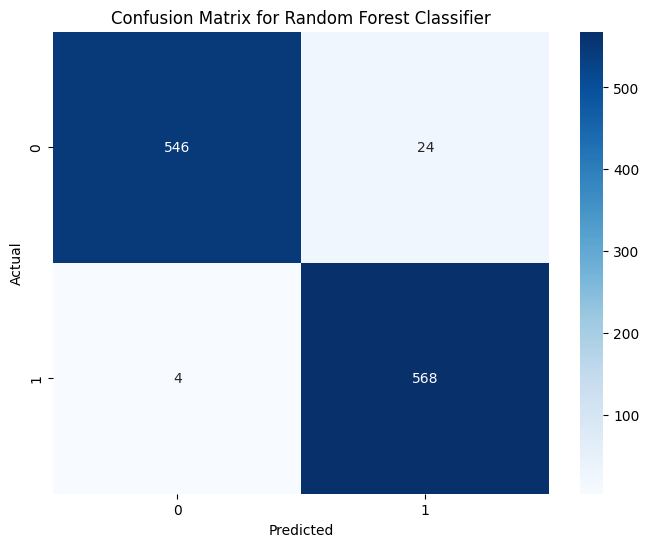

In [169]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
print("Random Forest")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}\n")
    
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Support Vector Machine
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       570
           1       0.89      0.97      0.93       572

    accuracy                           0.92      1142
   macro avg       0.93      0.92      0.92      1142
weighted avg       0.93      0.92      0.92      1142

ROC AUC Score: 0.9757514415409153



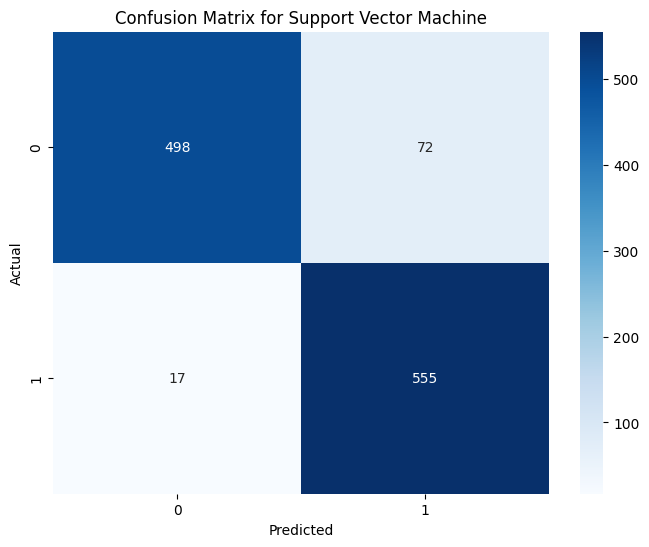

In [170]:
# Support Vector Machine
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_pred_proba = svc.predict_proba(X_test)[:, 1]
print("Support Vector Machine")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}\n")

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       570
           1       0.90      0.91      0.91       572

    accuracy                           0.91      1142
   macro avg       0.91      0.91      0.91      1142
weighted avg       0.91      0.91      0.91      1142

ROC AUC Score: 0.970252116304748



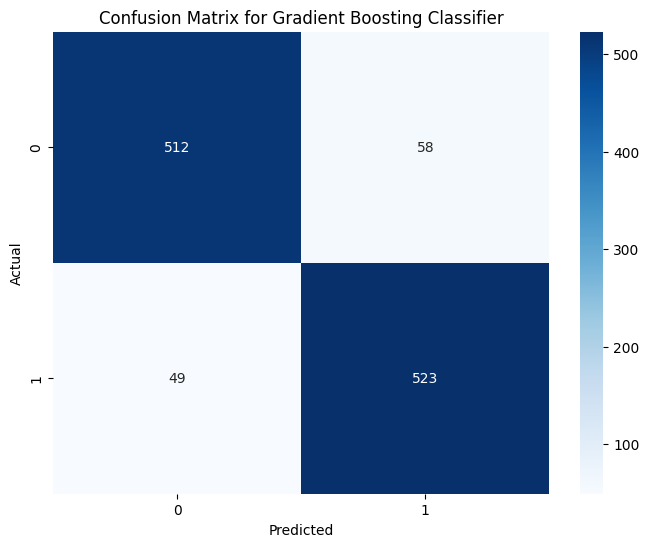

In [171]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
y_pred_proba = gbc.predict_proba(X_test)[:, 1]
print("Gradient Boosting Classifier")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}\n")

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.98      0.77      0.87       570
           1       0.81      0.99      0.89       572

    accuracy                           0.88      1142
   macro avg       0.90      0.88      0.88      1142
weighted avg       0.90      0.88      0.88      1142

ROC AUC Score: 0.9750352717457982



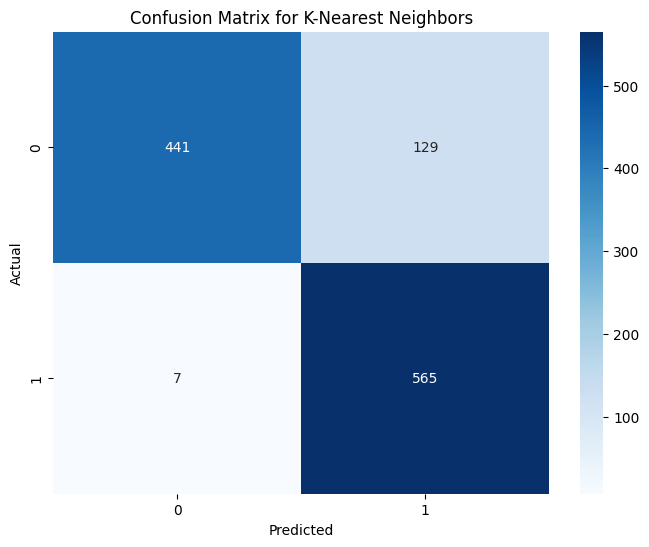

In [172]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]
print("K-Nearest Neighbors")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}\n")

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()